In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

Text(0.5, 1.0, 'Synthetic Data for Inverse Decision Mapper')

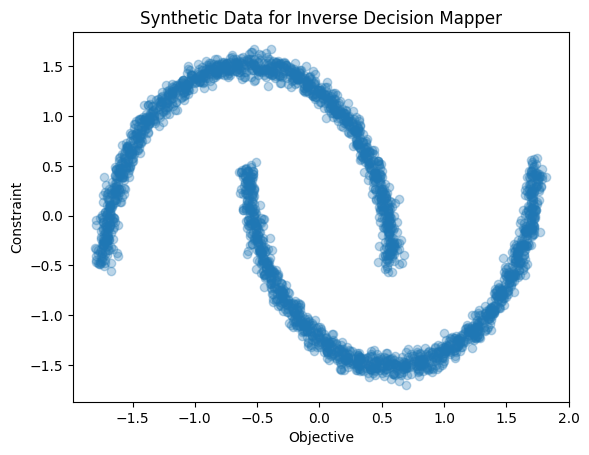

In [2]:
X, y = make_moons(n_samples=2500, noise=0.03)
y = X[:, 1].reshape(-1, 1)
X = X[:, 0].reshape(-1, 1)
x_scaler = StandardScaler()
y_scaler = StandardScaler()
X = x_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)
plt.scatter(X, y, alpha=0.3)
plt.xlabel("Objective")
plt.ylabel("Constraint")
plt.title("Synthetic Data for Inverse Decision Mapper")

<Axes: ylabel='Density'>

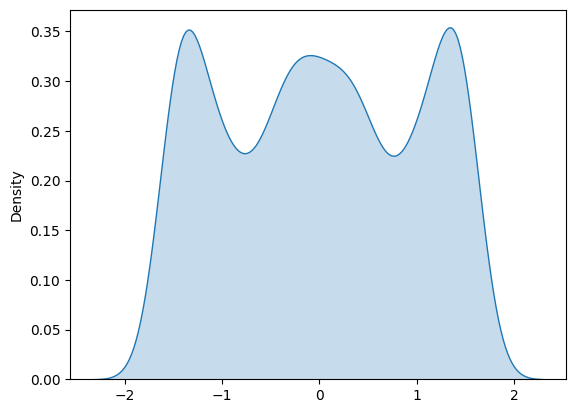

In [3]:
sns.kdeplot(x=y.flatten(), fill=True, cmap="Blues", thresh=0, levels=20)

<Axes: >

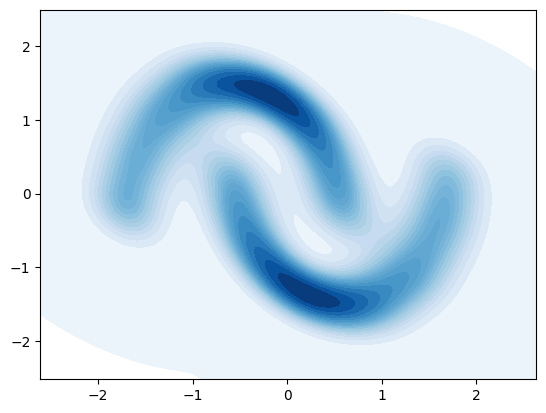

In [4]:
sns.kdeplot(x=X.flatten(), y=y.flatten(), fill=True, cmap="Blues", thresh=0, levels=20)

Text(0.5, 1.0, 'Linear Regression')

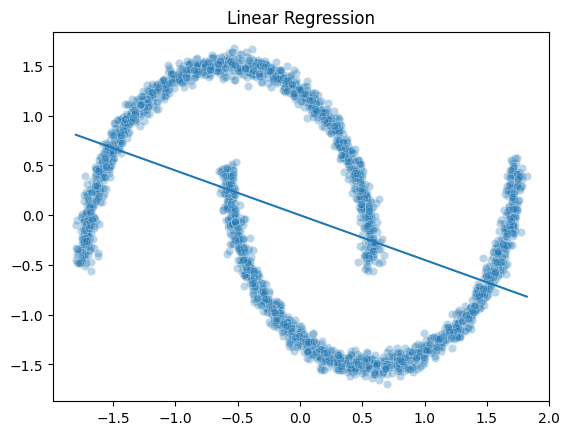

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))
y_pred = model.predict(X.reshape(-1, 1))
sns.scatterplot(x=X.flatten(), y=y.flatten(), alpha=0.3)
sns.lineplot(x=X.flatten(), y=y_pred.flatten())
plt.title("Linear Regression")

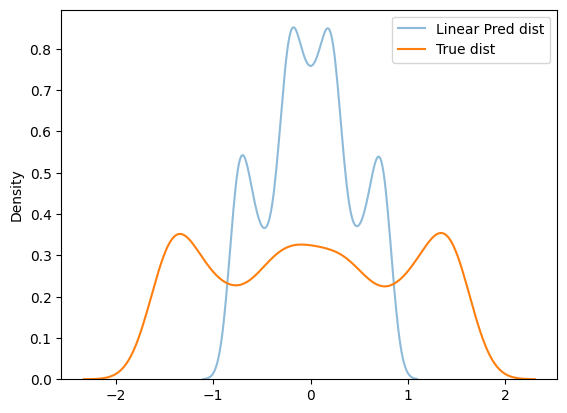

In [6]:
sns.kdeplot(y_pred.ravel(), alpha=0.5, label="Linear Pred dist")
sns.kdeplot(y.ravel(), label="True dist")
plt.legend()

In [7]:
from mdn_model import MDN

EPOCHS = 10000
BATCH_SIZE = len(X)
model = MDN(
    n_mixtures=-1,
    dist="laplace",
    input_neurons=1000,
    hidden_neurons=[25],
    gmm_boost=False,
    optimizer="adam",
    learning_rate=0.001,
    early_stopping=250,
    tf_mixture_family=True,
    input_activation="relu",
    hidden_activation="leaky_relu",
)
model.fit(X, y, epochs=EPOCHS, batch_size=BATCH_SIZE)

ModuleNotFoundError: No module named 'mdn_model'

In [ ]:
X.shape

(2500, 1)

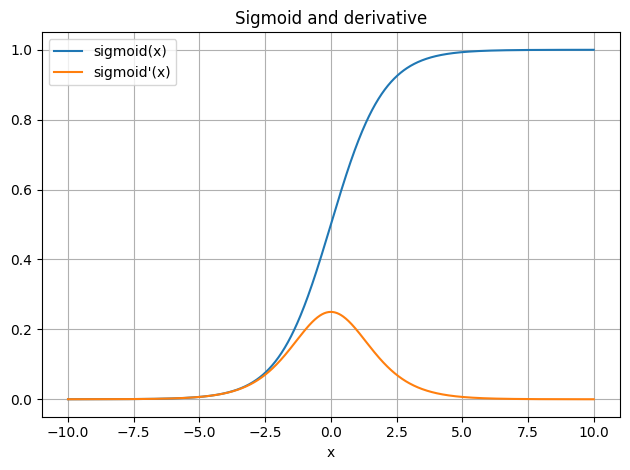

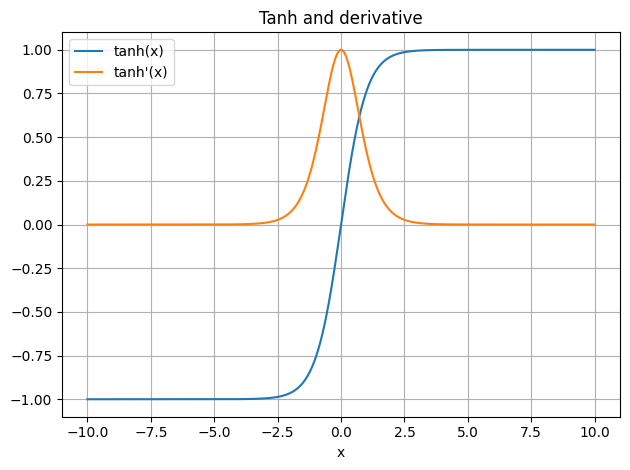

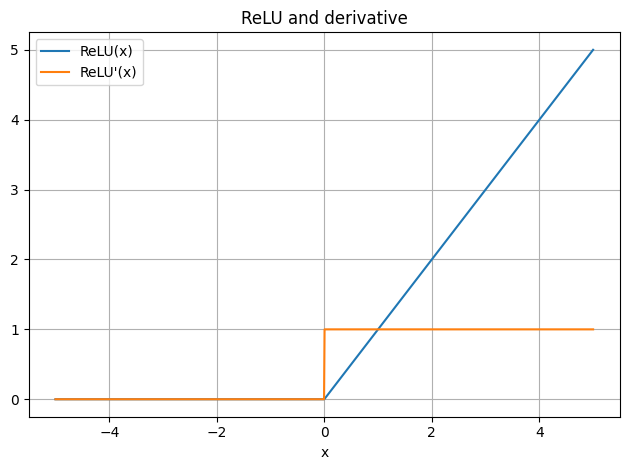

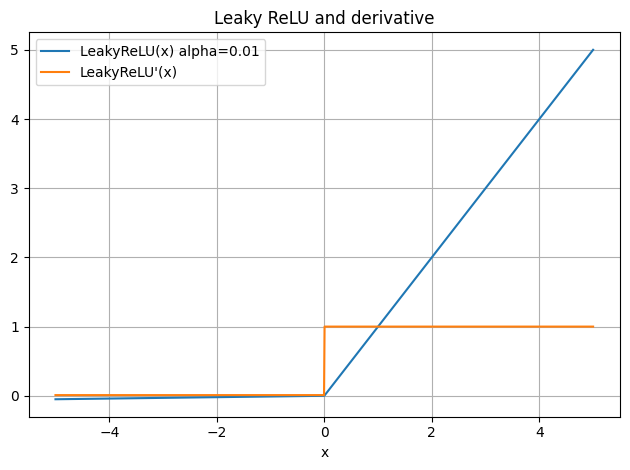

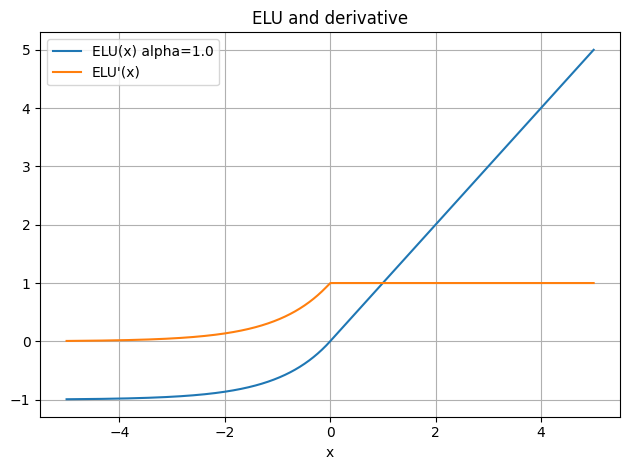

In [ ]:
# Plot activation functions and their derivatives in separate single plots (activation + derivative per plot).
import numpy as np
import matplotlib.pyplot as plt
from math import exp

# x ranges
x1 = np.linspace(-10, 10, 1000)  # for sigmoid/tanh
x2 = np.linspace(-5, 5, 1000)  # for ReLU/Leaky/ELU


# Activation functions and derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)


def tanh(x):
    return np.tanh(x)


def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2


def relu(x):
    return np.maximum(0, x)


def relu_derivative(x):
    return np.where(x > 0, 1.0, 0.0)


alpha = 0.01


def leaky_relu(x, alpha=alpha):
    return np.where(x > 0, x, alpha * x)


def leaky_relu_derivative(x, alpha=alpha):
    return np.where(x > 0, 1.0, alpha)


alpha_elu = 1.0


def elu(x, alpha=alpha_elu):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))


def elu_derivative(x, alpha=alpha_elu):
    return np.where(x > 0, 1.0, alpha * np.exp(x))


plots = []

# Sigmoid plot
plt.figure()
plt.plot(x1, sigmoid(x1), label="sigmoid(x)")
plt.plot(x1, sigmoid_derivative(x1), label="sigmoid'(x)")
plt.title("Sigmoid and derivative")
plt.xlabel("x")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Tanh plot
plt.figure()
plt.plot(x1, tanh(x1), label="tanh(x)")
plt.plot(x1, tanh_derivative(x1), label="tanh'(x)")
plt.title("Tanh and derivative")
plt.xlabel("x")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ReLU plot
plt.figure()
plt.plot(x2, relu(x2), label="ReLU(x)")
plt.plot(x2, relu_derivative(x2), label="ReLU'(x)")
plt.title("ReLU and derivative")
plt.xlabel("x")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Leaky ReLU plot
plt.figure()
plt.plot(x2, leaky_relu(x2), label=f"LeakyReLU(x) alpha={alpha}")
plt.plot(x2, leaky_relu_derivative(x2), label="LeakyReLU'(x)")
plt.title("Leaky ReLU and derivative")
plt.xlabel("x")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ELU plot
x3 = np.linspace(-5, 5, 1000)
plt.figure()
plt.plot(x3, elu(x3), label=f"ELU(x) alpha={alpha_elu}")
plt.plot(x3, elu_derivative(x3), label="ELU'(x)")
plt.title("ELU and derivative")
plt.xlabel("x")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

What to look for in the plots

**Sigmoid / Tanh plots**: notice their derivatives shrink toward zero for large |x| — that’s why repeated multiplications across layers kill gradients (vanishing).

**ReLU plot**: derivative is 1 for positive x and 0 for negative x — good for preventing vanishing on the positive side, but the flat zero region causes dying neurons if many inputs fall there.

**Leaky ReLU / ELU plots**: you’ll see a small but nonzero derivative for negative x — that’s the “tiny megaphone” that keeps gradients flowing and lets those neurons recover.

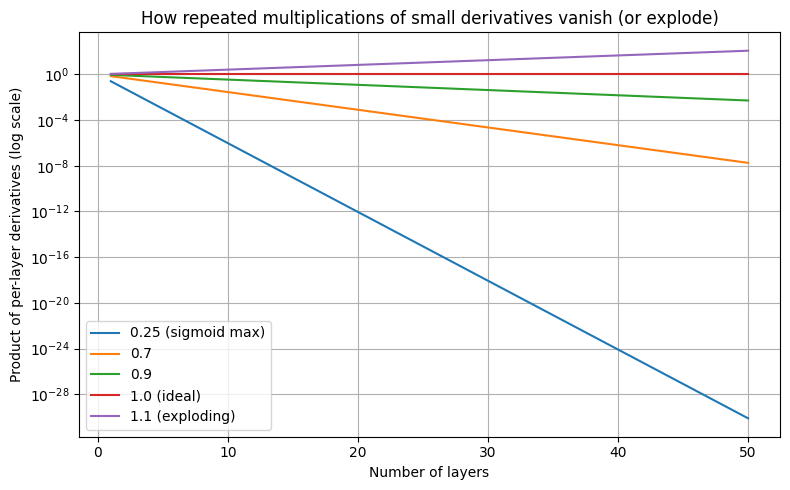

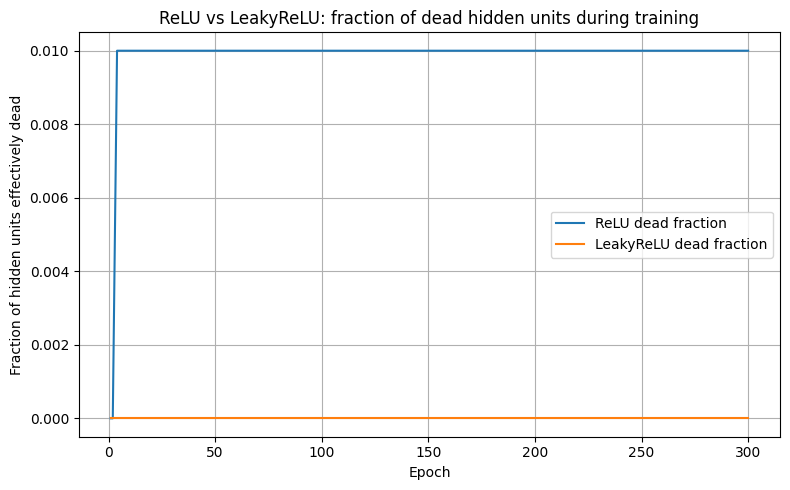

Final dead fraction ReLU: 0.010, last loss: 0.0367
Final dead fraction LeakyReLU: 0.000, last loss: 0.0367


In [ ]:
layers = np.arange(1, 51)
derivative_values = [
    0.25,
    0.7,
    0.9,
    1.0,
    1.1,
]  # representative per-layer derivative magnitudes
labels = ["0.25 (sigmoid max)", "0.7", "0.9", "1.0 (ideal)", "1.1 (exploding)"]

plt.figure(figsize=(8, 5))
for dv, lab in zip(derivative_values, labels):
    product = dv**layers
    plt.semilogy(
        layers, product, label=lab
    )  # log y-scale so small products are visible
plt.xlabel("Number of layers")
plt.ylabel("Product of per-layer derivatives (log scale)")
plt.title("How repeated multiplications of small derivatives vanish (or explode)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Visualization 2: simple training simulation showing "dying ReLU" vs LeakyReLU
# We'll train a tiny network (1 input -> hidden -> output) with many hidden units,
# track fraction of hidden units that become "dead" (output zero for all inputs) for ReLU vs LeakyReLU.


def relu(x):
    return np.maximum(0, x)


def relu_der(x):
    return (x > 0).astype(float)


def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)


def leaky_relu_der(x, alpha=0.01):
    return np.where(x > 0, 1.0, alpha)


def simulate_activation(
    activation="relu", alpha=0.01, epochs=200, hidden=100, lr=0.01, seed=0
):
    rng = np.random.RandomState(seed)
    # dataset: 1D input x -> target y = sin(2*pi*x) (normalized)
    X = rng.uniform(-1.0, 1.0, size=(200, 1))
    y = np.sin(2 * np.pi * X).ravel() * 0.5  # scale down amplitude
    # network params
    W = rng.normal(0, 0.5, size=(hidden, 1))  # hidden weights
    b = np.zeros(hidden)  # hidden biases
    v = rng.normal(0, 0.5, size=(hidden,))  # output weights (from hidden to scalar)
    # training
    dead_frac = []
    for ep in range(epochs):
        # forward
        hidden_lin = X.dot(W.T) + b  # shape (N_samples, hidden)
        if activation == "relu":
            H = relu(hidden_lin)
            H_der = relu_der(hidden_lin)
        else:
            H = leaky_relu(hidden_lin, alpha=alpha)
            H_der = leaky_relu_der(hidden_lin, alpha=alpha)
        y_pred = H.dot(v)
        loss = ((y_pred - y) ** 2).mean()
        # backprop (simple MSE gradients)
        grad_y = 2 * (y_pred - y) / X.shape[0]  # shape (N_samples,)
        # gradients for output weights v
        grad_v = H.T.dot(grad_y)  # shape (hidden,)
        # gradients for hidden layer (chain rule)
        # dL/dH = grad_y * v (broadcast), then multiply by derivative H_der to get dL/dhidden_lin
        dL_dH = np.outer(grad_y, v)  # (N_samples, hidden)
        dL_dhidden_lin = dL_dH * H_der  # (N_samples, hidden)
        # gradients for W and b
        grad_W = dL_dhidden_lin.T.dot(X)  # (hidden, 1)
        grad_b = dL_dhidden_lin.sum(axis=0)  # (hidden,)
        # gradient descent update
        v -= lr * grad_v
        W -= lr * grad_W
        b -= lr * grad_b
        # compute dead fraction: a neuron is "dead" if H[:,i] == 0 for all samples (exact zero)
        # For LeakyReLU neurons, exact zero unlikely; treat neuron as "effectively dead" if max activation magnitude is tiny
        if activation == "relu":
            dead = np.all(H <= 0, axis=0)  # boolean per neuron
        else:
            dead = np.max(np.abs(H), axis=0) < 1e-6
        dead_frac.append(dead.mean())
    return np.array(dead_frac), loss


# Run both simulations
epochs = 300
dead_relu, loss_relu = simulate_activation(
    "relu", epochs=epochs, hidden=200, lr=0.01, seed=1
)
dead_leaky, loss_leaky = simulate_activation(
    "leaky", alpha=0.01, epochs=epochs, hidden=200, lr=0.01, seed=1
)

# Plot dead fraction trajectories
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, epochs + 1), dead_relu, label="ReLU dead fraction")
plt.plot(np.arange(1, epochs + 1), dead_leaky, label="LeakyReLU dead fraction")
plt.xlabel("Epoch")
plt.ylabel("Fraction of hidden units effectively dead")
plt.title("ReLU vs LeakyReLU: fraction of dead hidden units during training")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print final stats
print(f"Final dead fraction ReLU: {dead_relu[-1]:.3f}, last loss: {loss_relu:.4f}")
print(
    f"Final dead fraction LeakyReLU: {dead_leaky[-1]:.3f}, last loss: {loss_leaky:.4f}"
)

## Key observations and interpretation

This section summarizes what each plot shows, why it matters for deep learning, and practical takeaways you can apply when designing or debugging networks.

### 1) Gradient decay / explosion (product of per-layer derivatives)

- The plot shows the product of a constant per-layer derivative across a range of layer counts (1 → 50) on a log (y) scale.
- Curves shown: 0.25, 0.7, 0.9, 1.0, and 1.1 — chosen to illustrate vanishing, borderline-stable, and exploding behaviors.
- Interpretation:
  - 0.25 (sigmoid-like) decays to ~0 extremely quickly: repeated multiplications push gradients toward zero (vanishing gradients).
  - 0.9 also decays exponentially but more slowly; deep stacks still lose early-layer gradient signal.
  - 1.0 is stable: gradients neither vanish nor explode (ideal per-layer derivative ~1).
  - 1.1 grows exponentially: small deviations above 1 compound and lead to exploding gradients.
- Practical takeaway: initialization, normalization, and activation choices should aim to keep effective per-layer gain near 1 to avoid numerical pathologies.

### 2) ReLU vs LeakyReLU training simulation (dead neurons)

- The simulation trains a tiny 1-input → hidden → output network (many hidden units) using MSE, and tracks the fraction of hidden units that become "effectively dead" over training.
- Observations from this run:
  - Standard ReLU produced a small fraction of dead units (≈1% in this seed/run).
  - LeakyReLU (α=0.01) produced effectively zero dead units in the same conditions.
  - Final training losses were similar between the two activations in this toy example.
- Why this happens:
  - ReLU derivative = 1 for x > 0 but 0 for x ≤ 0. If a neuron’s pre-activation becomes negative for every input and stays there, it receives zero gradient and cannot recover → "dying ReLU."
  - LeakyReLU gives a small slope for x ≤ 0, so gradients still flow and neurons can recover from poor initializations or noisy updates.
- Practical takeaway: use LeakyReLU or ELU when you are concerned about dead units, especially with aggressive learning rates or poor initialization; use ReLU when simplicity and sparsity are desired but monitor for dead units.

### Caveats and reproducibility notes

- This is a small toy experiment: results are illustrative, not definitive. Different seeds, learning rates, batch sizes, or architectures can change outcomes.
- The detect-dead heuristic here is conservative (exact zeros for ReLU, tiny-magnitude threshold for LeakyReLU). Consider using alternative metrics (e.g., sustained near-zero gradients, unit contribution to loss) for production analysis.

### Quick actions you can try

- Test different initializations (He vs Xavier) and observe the gradient-product plot or training stability.
- Try smaller/larger learning rates and compare dead-unit fraction trajectories.
- Replace ReLU with LeakyReLU or ELU in a full model and monitor validation accuracy and activation statistics.

These enhanced notes should make the plots easier to interpret and help you choose mitigations when designing or debugging deep models.